In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from scipy.stats import norm

## Criando os dataframes

In [186]:
df_acoes = pd.read_csv('data/statusinvest-acoes.csv', delimiter=";")
df_acoes.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,"22,59",NaN,"-19,70","2,33","1,04","30,55","-0,34","-12,41","-712,60",...,"0,45","0,54","0,42","3,62",NaN,"10.582.375,55","9,68","-1,15","0,04","2.668.685.928,96"
1,ABCB4,"16,92","8,26","4,78","0,73","0,07","35,76","27,56","19,63","3,40",...,"0,09","0,91","0,07","13,58","13,36","16.810.983,98","23,02","3,54","0,12","3.823.183.895,38"
2,ABEV3,"14,84","5,14","16,14","2,80","1,69","49,29","22,15","18,14","13,22",...,"0,60","0,40","0,58","10,72","14,74","466.734.715,33","5,29","0,92","1,14","233.418.213.731,82"
3,ADHM3,"1,56",NaN,"-4,09","-1,29","105,12","100,00","-13.548,48","-18.860,61","-5,69",...,"-81,72","82,72","0,14",NaN,NaN,NaN,"-1,21","-0,38","-0,58","25.439.770,20"
4,AERI3,"1,20",NaN,"-9,92","1,04","0,24","11,93","8,65","-3,76","4,31",...,"0,23","0,77","0,65",NaN,NaN,"8.531.497,88","1,15","-0,12","0,04","919.456.147,20"


In [187]:
df_acoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TICKER                  601 non-null    object
 1   PRECO                   601 non-null    object
 2   DY                      352 non-null    object
 3   P/L                     600 non-null    object
 4   P/VP                    600 non-null    object
 5   P/ATIVOS                600 non-null    object
 6   MARGEM BRUTA            573 non-null    object
 7   MARGEM EBIT             573 non-null    object
 8   MARG. LIQUIDA           573 non-null    object
 9   P/EBIT                  599 non-null    object
 10  EV/EBIT                 592 non-null    object
 11  DIVIDA LIQUIDA / EBIT   542 non-null    object
 12  DIV. LIQ. / PATRI.      461 non-null    object
 13  PSR                     570 non-null    object
 14  P/CAP. GIRO             588 non-null    object
 15  P. AT 

In [188]:
df_f11 = pd.read_csv('data/statusinvest-acoes.csv', delimiter=";")
df_f11.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,"22,59",NaN,"-19,70","2,33","1,04","30,55","-0,34","-12,41","-712,60",...,"0,45","0,54","0,42","3,62",NaN,"10.582.375,55","9,68","-1,15","0,04","2.668.685.928,96"
1,ABCB4,"16,92","8,26","4,78","0,73","0,07","35,76","27,56","19,63","3,40",...,"0,09","0,91","0,07","13,58","13,36","16.810.983,98","23,02","3,54","0,12","3.823.183.895,38"
2,ABEV3,"14,84","5,14","16,14","2,80","1,69","49,29","22,15","18,14","13,22",...,"0,60","0,40","0,58","10,72","14,74","466.734.715,33","5,29","0,92","1,14","233.418.213.731,82"
3,ADHM3,"1,56",NaN,"-4,09","-1,29","105,12","100,00","-13.548,48","-18.860,61","-5,69",...,"-81,72","82,72","0,14",NaN,NaN,NaN,"-1,21","-0,38","-0,58","25.439.770,20"
4,AERI3,"1,20",NaN,"-9,92","1,04","0,24","11,93","8,65","-3,76","4,31",...,"0,23","0,77","0,65",NaN,NaN,"8.531.497,88","1,15","-0,12","0,04","919.456.147,20"


In [189]:
df_f11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TICKER                  601 non-null    object
 1   PRECO                   601 non-null    object
 2   DY                      352 non-null    object
 3   P/L                     600 non-null    object
 4   P/VP                    600 non-null    object
 5   P/ATIVOS                600 non-null    object
 6   MARGEM BRUTA            573 non-null    object
 7   MARGEM EBIT             573 non-null    object
 8   MARG. LIQUIDA           573 non-null    object
 9   P/EBIT                  599 non-null    object
 10  EV/EBIT                 592 non-null    object
 11  DIVIDA LIQUIDA / EBIT   542 non-null    object
 12  DIV. LIQ. / PATRI.      461 non-null    object
 13  PSR                     570 non-null    object
 14  P/CAP. GIRO             588 non-null    object
 15  P. AT 

In [190]:
df_visc = pd.read_csv('data/VISC11 Historical Data.csv', delimiter=",")
df_visc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,101.94,101.41,101.99,101.14,18.34K,0.83%
1,03/30/2023,101.10,101.00,101.88,100.00,22.25K,0.15%
2,03/29/2023,100.95,101.46,101.83,100.50,25.94K,-0.20%
3,03/28/2023,101.15,101.89,102.50,101.06,25.95K,-0.08%
4,03/27/2023,101.23,102.51,102.85,101.06,24.75K,-1.23%


In [191]:
df_visc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      313 non-null    object 
 1   Price     313 non-null    float64
 2   Open      313 non-null    float64
 3   High      313 non-null    float64
 4   Low       313 non-null    float64
 5   Vol.      313 non-null    object 
 6   Change %  313 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.2+ KB


## Tratamento dos dados


In [192]:
def convert_to_float(value):
    new_value = value.replace(".", "")
    new_value = new_value.replace(",", ".")
    return float(new_value) # Converte a string em um float

# Cria DataFrame teste
df_teste = pd.DataFrame({"coluna1": ["19.999,99", "10.543,21", "3.210,15"],
                         "coluna2": ["9.876,54", "12.345,67", "5.432,10"]})

# Aplica a função no DataFrame
df_teste = df_teste.apply(lambda x: x.apply(convert_to_float))
df_teste

,coluna1,coluna2
0,19999.99,9876.54
1,10543.21,12345.67
2,3210.15,5432.10


In [193]:
# import locale

def str_to_float(string):
    locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
    try:
        string = string.replace(".", "").replace(",", ".")
        return float(string)
    except AttributeError:
        return 0

df_teste = pd.DataFrame({"coluna1": ["19.999,99", "10.543,21",0, "3.210,15"],
                         "coluna2": ["9.876,54", "12.345,67",0, "5.432,10"],
                         "coluna3": ["9.876,54", "12.345,67", None, "5.432,10"]}
                        )

df_teste = df_teste.apply(lambda x: x.apply(str_to_float))
df_teste

,coluna1,coluna2,coluna3
0,19999.99,9876.54,9876.54
1,10543.21,12345.67,12345.67
2,0.00,0.00,0.00
3,3210.15,5432.10,5432.10


In [194]:
def clean_string_k(string):
    try:
        string = string.replace("K", "")
        return float(string)
    except AttributeError:
        return 0


def clean_string_perc(string):
    try:
        string = string.replace("%", "")
        return float(string)
    except AttributeError:
        return 0

Com isso temos todas as funções necessárias para fazer o tratamento dos dados.
Agora vamos aplicar nos dataframes.

In [195]:
# Base de dados de ações
df_acoes.fillna(0, inplace=True)
df_acoes.iloc[:,1:] = df_acoes.iloc[:, 1:].apply(lambda x: x.apply(str_to_float))
df_acoes.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,22.59,0.00,-19.70,2.33,1.04,30.55,-0.34,-12.41,-712.60,...,0.45,0.54,0.42,3.62,0.00,1.058238e+07,9.68,-1.15,0.04,2.668686e+09
1,ABCB4,16.92,8.26,4.78,0.73,0.07,35.76,27.56,19.63,3.40,...,0.09,0.91,0.07,13.58,13.36,1.681098e+07,23.02,3.54,0.12,3.823184e+09
2,ABEV3,14.84,5.14,16.14,2.80,1.69,49.29,22.15,18.14,13.22,...,0.60,0.40,0.58,10.72,14.74,4.667347e+08,5.29,0.92,1.14,2.334182e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.000000e+00,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,1.20,0.00,-9.92,1.04,0.24,11.93,8.65,-3.76,4.31,...,0.23,0.77,0.65,0.00,0.00,8.531498e+06,1.15,-0.12,0.04,9.194561e+08


In [196]:
# Base de dados de F11
df_f11.fillna(0, inplace=True)
df_f11.iloc[:,1:] = df_f11.iloc[:, 1:].apply(lambda x: x.apply(str_to_float))
df_f11.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,22.59,0.00,-19.70,2.33,1.04,30.55,-0.34,-12.41,-712.60,...,0.45,0.54,0.42,3.62,0.00,1.058238e+07,9.68,-1.15,0.04,2.668686e+09
1,ABCB4,16.92,8.26,4.78,0.73,0.07,35.76,27.56,19.63,3.40,...,0.09,0.91,0.07,13.58,13.36,1.681098e+07,23.02,3.54,0.12,3.823184e+09
2,ABEV3,14.84,5.14,16.14,2.80,1.69,49.29,22.15,18.14,13.22,...,0.60,0.40,0.58,10.72,14.74,4.667347e+08,5.29,0.92,1.14,2.334182e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.000000e+00,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,1.20,0.00,-9.92,1.04,0.24,11.93,8.65,-3.76,4.31,...,0.23,0.77,0.65,0.00,0.00,8.531498e+06,1.15,-0.12,0.04,9.194561e+08


In [197]:
df_visc.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [198]:
df_visc.fillna(0, inplace=True)
df_visc.iloc[:, -1] = df_visc.iloc[:, -1].apply(lambda x: clean_string_perc(x))
df_visc.iloc[:, -2] = df_visc.iloc[:, -2].apply(lambda x: clean_string_k(x))
df_visc.iloc[:, -2:].head()

,Vol.,Change %
0,18.34,0.83
1,22.25,0.15
2,25.94,-0.20
3,25.95,-0.08
4,24.75,-1.23


In [199]:
df_visc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      313 non-null    object 
 1   Price     313 non-null    float64
 2   Open      313 non-null    float64
 3   High      313 non-null    float64
 4   Low       313 non-null    float64
 5   Vol.      313 non-null    float64
 6   Change %  313 non-null    float64
dtypes: float64(6), object(1)
memory usage: 17.2+ KB


## Análise exploratória

In [200]:
print(df_visc.shape)
df_visc

(313, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,101.94,101.41,101.99,101.14,18.34,0.83
1,03/30/2023,101.10,101.00,101.88,100.00,22.25,0.15
2,03/29/2023,100.95,101.46,101.83,100.50,25.94,-0.20
3,03/28/2023,101.15,101.89,102.50,101.06,25.95,-0.08
4,03/27/2023,101.23,102.51,102.85,101.06,24.75,-1.23
...,...,...,...,...,...,...,...
308,01/07/2022,101.70,102.11,103.00,101.10,20.28,-0.40
309,01/06/2022,102.11,101.16,102.40,100.55,20.34,0.94
310,01/05/2022,101.16,101.96,102.49,101.16,14.37,-0.78
311,01/04/2022,101.96,102.11,103.26,101.50,20.32,0.26


<AxesSubplot:>

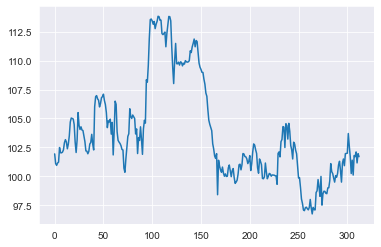

In [201]:
df_visc['Price'].plot()

In [202]:
x_list = np.linspace(
    df_visc['Price'].min(),
    df_visc['Price'].max(),
    100
)

In [204]:
y_list = norm.pdf(x_list, loc=df_visc['Price'].mean(), scale=df_visc['Price'].std())

<AxesSubplot:>

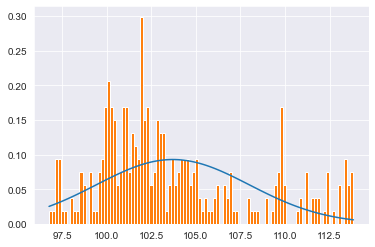

In [207]:
plt.plot(x_list, y_list)
df_visc['Price'].hist(bins=100, density=True)

In [208]:
from scipy.stats import probplot

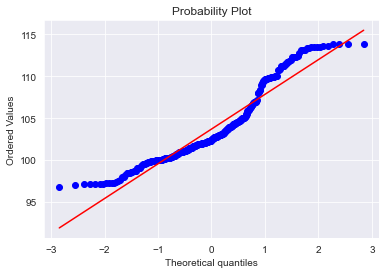

In [216]:
probplot(df_visc['Price'], dist='norm' , fit = True, plot=plt);

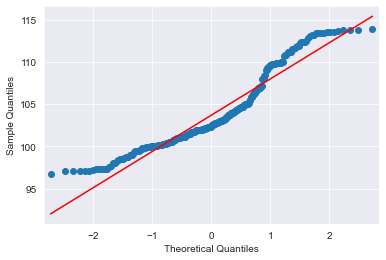

In [213]:
import statsmodels.api as sm
sm.qqplot(df_visc['Price'], line='s');

In [215]:
df_visc['log_Price'] = np.log(df_visc['Price'] + 1)

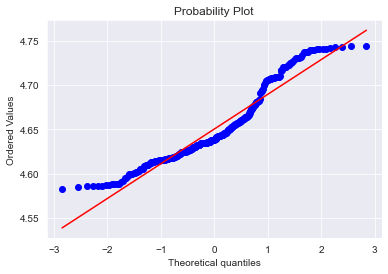

In [217]:
probplot(df_visc['log_Price'], dist='norm' , fit = True, plot=plt);

In [222]:
x_list = np.linspace(
    df_visc['log_Price'].min(),
    df_visc['log_Price'].max(),
    100
)

y_list = norm.pdf(x_list, loc=df_visc['log_Price'].mean(), scale=df_visc['Price'].std())

<AxesSubplot:>

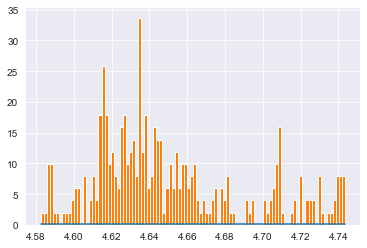

In [223]:
plt.plot(x_list, y_list)
df_visc['log_Price'].hist(bins=100, density=True)

### Análise exploratória do FII

In [224]:
df_f11.head().columns

Index(['TICKER', 'PRECO', 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'MARGEM BRUTA',
       'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 'EV/EBIT',
       'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO',
       'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROE', 'ROA', 'ROIC',
       'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS',
       'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA',
       ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO'],
      dtype='object')

In [225]:
df_f11.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,22.59,0.00,-19.70,2.33,1.04,30.55,-0.34,-12.41,-712.60,...,0.45,0.54,0.42,3.62,0.00,1.058238e+07,9.68,-1.15,0.04,2.668686e+09
1,ABCB4,16.92,8.26,4.78,0.73,0.07,35.76,27.56,19.63,3.40,...,0.09,0.91,0.07,13.58,13.36,1.681098e+07,23.02,3.54,0.12,3.823184e+09
2,ABEV3,14.84,5.14,16.14,2.80,1.69,49.29,22.15,18.14,13.22,...,0.60,0.40,0.58,10.72,14.74,4.667347e+08,5.29,0.92,1.14,2.334182e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.000000e+00,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,1.20,0.00,-9.92,1.04,0.24,11.93,8.65,-3.76,4.31,...,0.23,0.77,0.65,0.00,0.00,8.531498e+06,1.15,-0.12,0.04,9.194561e+08


In [ ]:
## Create some plots

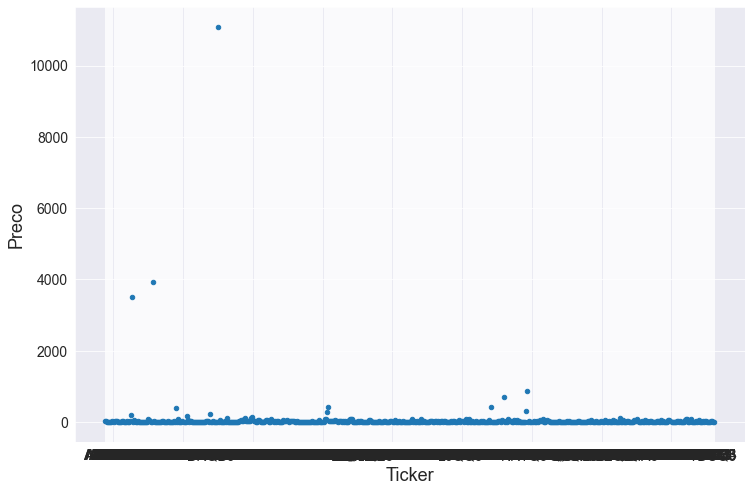

In [228]:
# "Create a scatter plot of df_f11 with TICKER on the X-axis and PRICE on the Y-axis"
ax = df_f11.plot(kind='scatter', x='TICKER', y='PRECO', figsize=(12,8))


ax.set_xlabel('Ticker', fontsize=18)
ax.set_ylabel('Preco', fontsize=18)


ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

80.15


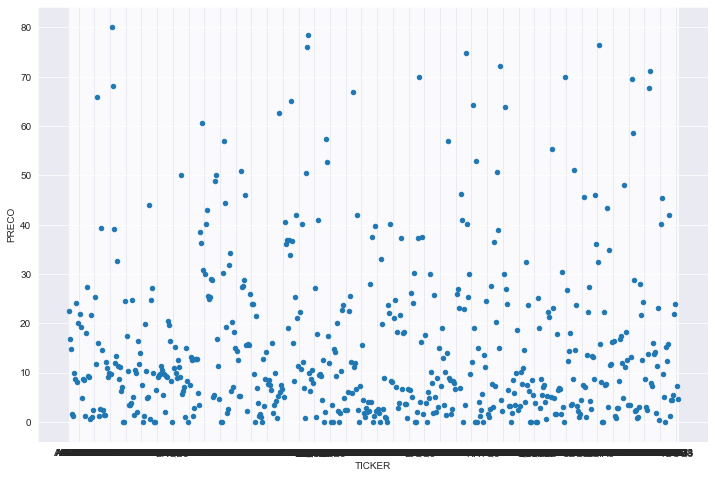

In [233]:
'''Calculate the percetile of 95 of df_f11['PRECO'] and store it in the variable preco_95_perc'''
preco_95_perc = np.percentile(df_f11['PRECO'], 95)
print(preco_95_perc)
'''Create a new dataframe df_f11_95 where the PRECO is less than preco_95_perc'''
df_f11_95 = df_f11[df_f11['PRECO'] <= preco_95_perc]

'''Create a scatter plot of df_f11_95 with TICKER on the X-axis and PRICE on the Y-axis'''
ax = df_f11_95.plot(kind='scatter', x='TICKER', y='PRECO', figsize=(12,8))

In [234]:
df_f11['PRECO'].min(), df_f11['PRECO'].max()

(0.0, 11091.73)

In [235]:
df_f11_95['PRECO'].min(), df_f11_95['PRECO'].max()

(0.0, 80.15)

In [236]:
df_f11.shape, df_f11_95.shape

((601, 30), (571, 30))

In [241]:
print(np.percentile(df_f11.iloc[:,1:], 95, axis=0))

[8.01500000e+01 1.73500000e+01 4.99600000e+01 5.04000000e+00
 2.58000000e+00 8.90500000e+01 1.27340000e+02 1.08480000e+02
 2.84000000e+01 3.41000000e+01 1.20300000e+01 2.16000000e+00
 1.03100000e+01 5.55100000e+01 0.00000000e+00 6.73000000e+00
 5.07700000e+01 2.11600000e+01 3.28400000e+01 8.40000000e-01
 2.26000000e+00 1.44000000e+00 3.65400000e+01 5.46700000e+01
 1.69117160e+08 7.44600000e+01 1.45400000e+01 1.28000000e+00
 4.29551432e+10]
